In [1]:
import pandas as pd
import numpy as np
import jdc
from sklearn.model_selection import train_test_split
from Data_Preprocess import Data_Preprocess
from Model import GaussianLinearClassifier
from Metrics import Metrics

# 3.1 Preprocessing

In [2]:
url = 'mushroom.txt'
column_names_csv = 'mushroom_feature_names.csv'
preprocessing = Data_Preprocess(url, column_names_csv)

# Q 3.1.1

In [3]:
preprocessing.load_dataset()

# Q 3.1.2

In [4]:
data_type = preprocessing.display_data_types()

# Q 3.1.3

Most of the features as generic text or string data.

<span style="color:red">Warning:</span>
: Unique values for stalk-root contains missing value

In [5]:
preprocessing.display_unique_values()

Unique values for class:
['p' 'e']

Unique values for cap-shape:
['x' 'b' 's' 'f' 'k' 'c']

Unique values for cap-surface:
['s' 'y' 'f' 'g']

Unique values for cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

Unique values for bruises:
['t' 'f']

Unique values for odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Unique values for gill-attachment:
['f' 'a']

Unique values for gill-spacing:
['c' 'w']

Unique values for gill-size:
['n' 'b']

Unique values for gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Unique values for stalk-shape:
['e' 't']

Unique values for stalk-root:
['e' 'c' 'b' 'r' nan]

Unique values for stalk-surface-above-ring:
['s' 'f' 'k' 'y']

Unique values for stalk-surface-below-ring:
['s' 'f' 'y' 'k']

Unique values for stalk-color-above-ring:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

Unique values for stalk-color-below-ring:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

Unique values for veil-type:
['p']

Unique values for veil-color:
['w' 'n' 'o' 'y']

Unique 

# Q 3.1.4

Mahalanobis distance:
$$ D(x) = \sqrt{ (x - \mu)^T \Sigma^{-1} (x - \mu) } $$
The Mahalanobis distance is typically calculated on numerical data.

When our features have a data type of string (text),
we cannot directly calculate the Mahalanobis distance without
converting the data to a numerical format first.

# Q 3.1.6
What is a nan value?
A "NaN" value stands for "Not-a-Number."

It is a special floating-point value used in computing to represent

__undefined__ or __unrepresentable__ values, often arising from mathematical operations or data processing.
stalk-root has 2480 nan values others have 0.

In [6]:
nan_counts = preprocessing.drop_columns_with_high_nan(threshold=2000)

# Q 3.1.5
ordinal relationships between categories

In [7]:
preprocessing.encode_categorical_features()
encoded_data_types = preprocessing.display_data_types()

In [8]:
dataset = preprocessing.dataset

# 3.2 Creating our model: LDA

# Q 3.2.1

In [9]:
X = dataset.drop(columns=['class'])
y = dataset['class']

# Q 3.2.8

what is variance?
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n} $$

In [10]:
variances = np.var(X, axis=0)
low_variance_features = np.where(variances < 0.01)[0]
X_filtered = np.delete(X, low_variance_features, axis=1)

# Q 3.2.2

what is random state?

+ if you use the same random_state value in different runs of your program, you will get the same data split every time.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Q 3.2.3

what is the Bayes rule? It describes how to update the probability for a hypothesis (or an event) based on new evidence. 

$$ P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)} $$

How is it used in Bayesian classification? 

1. Training Phase:

       + Collect and preprocess your training data, which typically consists of labeled examples.

       + Calculate class probabilities (P(A)): For each class label, compute the prior probability of that class in the training data. This is often done by counting the number of occurrences of each class in the training set.

       + Calculate conditional probabilities (P(B∣A)): For each feature, compute the likelihood of observing that feature given a specific class. This involves calculating the conditional probability of each feature occurring within each class.

2. Testing or Prediction Phase:

       + Given a new data point (features), use Bayes' Rule to calculate the posterior probability (P(A∣B)) for each possible class.

       + To predict the class label for the new data point, select the class with the highest posterior probability. This is often referred to as the Maximum A Posteriori (MAP) decision rule.

What is each term of this rule called?

+ The __"prior probability"__ (P(A)) is the initial belief in the probability of a particular class.
+ The __"likelihood"__ (P(B∣A)) describes how likely the observed features are to occur given a specific class.
+ The __"evidence"__ (P(B)) represents the overall likelihood of observing the given features, regardless of the class.
+ The __"posterior probability"__ (P(A∣B)) is the updated belief in the probability of a particular class after observing the features.

# Q 3.2.4

What are the model parameters of LDA and QDA classifiers? These classifiers are based on different assumptions about the underlying data distribution,
and as a result, they have different sets of model parameters.

1. LDA (Linear Discriminant Analysis):
    LDA assumes that all classes have a common covariance matrix, and the decision boundaries between classes are linear.

    + Class Priors (ϕ_k): These are the prior probabilities of each class in the training data.
    + Class Means (μ_k): For each class, there is a vector of means representing the mean feature values for that class. These vectors capture the central tendency of feature values for each class.
    + Shared Covariance Matrix (Σ): This matrix characterizes the shape of the distribution of data points within each class which is why it's "linear" discriminant analysis.

2. QDA (Quadratic Discriminant Analysis): QDA, in contrast to LDA, allows each class to have its own covariance matrix and does not assume a common covariance matrix. 

    + Class Priors (ϕ_k): Similar to LDA, these represent the prior probabilities of each class in the training data.
    + Class Means (μ_k): QDA also calculates the mean feature values for each class. These vectors capture the central tendency of feature values for each class.
    + Class-Specific Covariance Matrices (Σ_k): Each class has its own covariance matrix, representing the shape of the data distribution for that class. This results in more flexibility in modeling the data distribution, making QDA "quadratic" discriminant analysis.

Between QDA and LDA, which one has potentially more parameters? why?

LDA typically has potentially fewer parameters compared to QDA because it assumes a shared covariance matrix among all classes, whereas QDA allows each class to have its own covariance matrix. 

# Q 3.2.5

___The probability density function (PDF)___ for a univariate __(single-variable)__ Gaussian distribution 

$$ f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $$


The pdf of a __multivariate__ normal distribution. $\mathbf{x}$ is a vector of observed values with __d__ features, 

$$ p(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) $$

___likelihood___ function for a Gaussian distribution:
$$  L(\boldsymbol{\mu}, \boldsymbol{\Sigma} | \mathbf{x}) = p(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma})  $$


 the likelihood for each class $i$ $(L_i)$ :

$$ L_i(\boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i | \mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}_i|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^T \boldsymbol{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i)\right) $$

Estimating Probability:

From Bayes Theorem: 
$$ P(y_k | \mathbf{X}) = \frac{\prod_{k=1}^{n} L(y_k | \mathbf{x}_i)}{\sum_i \prod_i L(y_i | \mathbf{x})}$$


To predict the class $ (\hat{y})$, you would maximize the likelihood over all classes:

$$ \hat{y} = \arg\max_i L_i(\boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i | \mathbf{x}) $$

the goal is to model p(x|y)p(y) for each class
1. p(y) for each class
2. P(X|y=i) is multivariat normal disturbution
    - mu_i: mean of data of class i
    - pi_i: mean of data of class i
    - sigma_i: covariance of data class i
        + In LDA this sigma is shared for all the classes
        + In QDA there are a sigma per each class
3. log-likelihood (log P(X|y))
4. derivation of log-likelihood respect to sigma and mu for each class:

    <span style="color:red">
    - In LDA there is a shared sigma therefor we do not have sigma_i</span>

5. replace Sigma_mle, mu_i_mle and pi_i_mle in P(X|y)
6. Calculate P(X)
7. using baysien rule and argmax we can predict X_new

In the context of LDA or GDA, it's assumed that both classes share a common covariance matrix Σ and only differ in their means. When estimating the gradient with respect to Σ, the assumption is that the covariance matrix should be the same for both classes, so an average of the class means is used.

$$ \hat{\mu}_{MLE} = \frac{\sum_{j=1}^{m} 1\{y(j) = i\}X(j)}{\sum_{j=1}^{m} 1\{y(j) = i\}} $$


$$ \hat{\Sigma}_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu}) (x_i - \hat{\mu})^T $$


$$ p(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) $$

In [12]:
linearClassifier = GaussianLinearClassifier()
linearClassifier.fit(X_train, y_train)

# Q3.2.6

In [13]:
pred_likelihood_train = linearClassifier.predict_likelihood(X_train)
pred_likelihood_test = linearClassifier.predict_likelihood(X_test)

In [14]:
pred_dist_train = linearClassifier.predict_distance(X_train)
pred_dist_test = linearClassifier.predict_distance(X_test)

# Q3.2.10

In [15]:
metrics_train = Metrics(y_train)
metrics_test = Metrics(y_test)

##### accuracy

In [16]:
acc_likelihood_train = metrics_train.accuracy(pred_likelihood_train)
print("Accuracy likelihood train: ", acc_likelihood_train)
acc_likelihood_test = metrics_test.accuracy(pred_likelihood_test)
print("Accuracy likelihood test: ", acc_likelihood_test)

Accuracy likelihood train:  0.9479919987690414
Accuracy likelihood test:  0.944


In [17]:
acc_dist_train = metrics_train.accuracy(pred_dist_train)
print("Accuracy distance train: ", acc_dist_train)
acc_dist_test = metrics_test.accuracy(pred_dist_test)
print("Accuracy distance test: ", acc_dist_test)

Accuracy distance train:  0.9493768272041853
Accuracy distance test:  0.9458461538461539


#### precision 
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$

In [18]:
prec_likelihood_train = metrics_train.precision(pred_likelihood_train)
print("Precision likelihood train: ", prec_likelihood_train)
prec_likelihood_test = metrics_test.precision(pred_likelihood_test)
print("Precision likelihood test: ", prec_likelihood_test)

Precision likelihood train:  [0.9375542064180399, 0.9598684210526316]
Precision likelihood test:  [0.9402810304449649, 0.9481193255512321]


In [19]:
prec_dist_train = metrics_train.precision(pred_dist_train)
print("Precision distance train: ", prec_dist_train)
prec_dist_test = metrics_test.precision(pred_dist_test)
print("Precision distance test: ", prec_dist_test)

Precision distance train:  [0.94, 0.959986880944572]
Precision distance test:  [0.9435957696827262, 0.9483204134366925]


#### Recall
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

In [20]:
rec_likelihood_train = metrics_train.recall(pred_likelihood_train)
print("Recall likelihood train: ", rec_likelihood_train)
rec_likelihood_test = metrics_test.recall(pred_likelihood_test)
print("Recall likelihood test: ", rec_likelihood_test)

Recall likelihood train:  [0.9637444279346211, 0.9310784939374601]
Recall likelihood test:  [0.9525504151838672, 0.9347826086956522]


In [21]:
rec_dist_train = metrics_train.recall(pred_dist_train)
print("Recall distance train: ", rec_dist_train)
rec_dist_test = metrics_test.recall(pred_dist_test)
print("Recall distance test: ", rec_dist_test)

Recall distance train:  [0.9637444279346211, 0.9339502233567326]
Recall distance test:  [0.9525504151838672, 0.9386189258312021]


#### f1_score
$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [22]:
f1_likelihood_train = metrics_train.f1_score(pred_likelihood_train)
print("F1_score likelihood train: ", f1_likelihood_train)
f1_likelihood_test = metrics_test.f1_score(pred_likelihood_test)
print("F1_score likelihood test: ", f1_likelihood_test)

F1_score likelihood train:  [0.9504689331770223, 0.9452542921930677]
F1_score likelihood test:  [0.9463759575721863, 0.9414037347070187]


In [23]:
f1_dist_train = metrics_train.f1_score(pred_dist_train)
print("F1_score distance train: ", f1_dist_train)
f1_dist_test = metrics_test.f1_score(pred_dist_test)
print("F1_score distance test: ", f1_dist_test)

F1_score distance train:  [0.9517241379310344, 0.9467895843441694]
F1_score distance test:  [0.9480519480519479, 0.9434447300771209]


#### misclassified samples

In [24]:
mis_likelihood_train = metrics_train.misclassified_samples(pred_likelihood_train)
print("misclassified train samples by likelihood: ", mis_likelihood_train)
mis_likelihood_test = metrics_test.misclassified_samples(pred_likelihood_test)
print("misclassified test samples by likelihood: ", mis_likelihood_test)

misclassified train samples by likelihood:  338
misclassified test samples by likelihood:  91


In [25]:
mis_dist_train = metrics_train.misclassified_samples(pred_dist_train)
print("misclassified train samples by distance: ", mis_dist_train)
mis_dist_test = metrics_test.misclassified_samples(pred_dist_test)
print("misclassified test samples by distance: ", mis_dist_test)

misclassified train samples by distance:  329
misclassified test samples by distance:  88


# Q3.2.11

#### confusion matrix

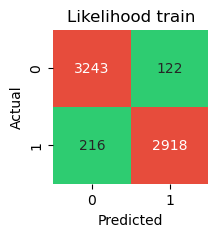

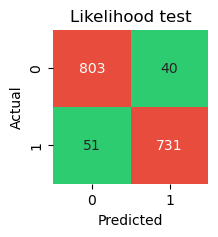

In [27]:
metrics_train.display_confusion_matrix(pred_likelihood_train,"Likelihood train")
metrics_test.display_confusion_matrix(pred_likelihood_test,"Likelihood test")

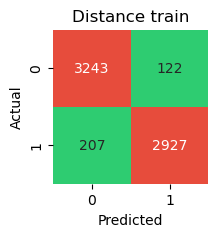

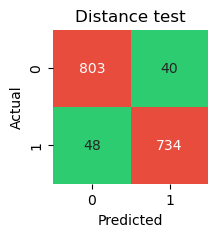

In [28]:
metrics_train.display_confusion_matrix(pred_dist_train,"Distance train")
metrics_test.display_confusion_matrix(pred_dist_test,"Distance test")

Misclassifying a poisonous mushroom as safe can have severe consequences, potentially leading to serious health issues or even death. In the context of mushroom classification, the cost of missing a poisonous mushroom is generally considered higher.

# Q3.2.12

Linear Discriminant Analysis (LDA):

    Class Priors (ϕ_k): Two parameters (one for each class).
    Class Means (μ_k): 40 parameters (20 for each class).
    Shared Covariance Matrix (Σ): 20 parameters (assuming a shared covariance matrix among classes).
    Total Parameters for LDA: 2 + 40 + 20 = 62 parameters

Quadratic Discriminant Analysis (QDA):

    Class Priors (ϕ_k): Two parameters (one for each class).
    Class Means (μ_k): 40 parameters (20 for each class).
    Class-Specific Covariance Matrices (Σ_k): 40 parameters (assuming a separate covariance matrix for each class).
    Total Parameters for QDA: 2 + 40 + 40 = 82 parameters

Logistic Regression:

    For logistic regression, the number of parameters is determined by the number of features. 
    Total Parameters for Logistic Regression: 20 (weights) + 1 (bias) = 21 parameters